<a href="https://colab.research.google.com/github/gitmystuff/DTSC5810/blob/main/Week_07-Predictive_Analytics/Decision_Trees_with_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees with Fine Tuning

## Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

https://en.wikipedia.org/wiki/Decision_tree

                                      Chillin with some grillin?
                                         Is it cloudy today?
                                            (Root Node)
                                                /\
                                           yes /  \ no
                                              /    \
                                         chance    grillin
                                        of rain?      
                                            /\
                                       yes /  \ no
                                          /    \
                                  no grillin     grillin
                                   

### Decision Tree Terms

* Root Node: Represents our population from which two or more subsets are divided up
* Decision Node: Sub-nodes divided into more sub-nodes based on a decision
* Splitting: dividing a node into sub-nodes
* Leaf / Terminal Node: Node with no children or sub-nodes
* Branch: A section of a decision tree
* Pruning: Eliminating branches and nodes
* Parent / Children: The relationship between nodes and their sub-nodes


Why don’t decision tree procedures look for multiway splits on numeric attributes?

* Because binary splits are sufficient. They keep things simple, are efficient to calculate and still allow multi way splits in sub trees. There is little rational in a priori preferring multi way splits on a single feature over splitting on diverse features.
* We don't build optimal trees, that would be NP hard. We build trees greedily. By doing only binary decisions we increase the number of decision points where we make locally optimal choices this is a good thing.

https://www.quora.com/Why-don%E2%80%99t-decision-tree-procedures-look-for-multiway-splits-on-numeric-attributes

### Splitting Trees

The idea behind building trees is, finding the best feature to split on that generates the largest information gain or provides the least uncertainity in the following leafs.

https://www.kaggle.com/code/ma7555/decision-trees-information-gain-from-scratch

Information gain is a decrease in entropy. Decision trees make use of information gain and entropy to determine which feature to split into nodes to get closer to predicting the target and also to determine when to stop splitting.

https://www.askpython.com/python/examples/decision-trees

https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

* Reduction in Variance
* Gini Impurity
* Entropy
* Information Gain
* Chi Square

### Gini

* Probability of a specific feature that is classified incorrectly when selected randomly
* The more diverse the higher the gini impurity index
* Gini index = probability of picking two distinct elements
* Gini = 0, purity of classification
* Gini = 1, random distribution
* Gini = .5, equal distribution of elements
* Favors larger partitions and easy to implement

Gini Impurity = 1 - Gini

### $\sum{p_i^2}$

### Entropy

* Measures uncertainty in a dataset
* Measures disorder
* Count the number of unique labels in a feature
* $entropy= -p_1log(p_1)-p_2log(p_2)...$
* $p_i$ = 1, all members have property i
* $p_i$ = 0, no members have property i
* For two classes q = 1 - p
* q = 0, one class is dominant, set has minimal disorder (it is pure) and the entropy is zero
* q = p = 0.5, set is balanced and entropy is 1
* q = 1, other class is dominant and entropy is back to zero

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf (page 51 - 52)

$\sum{p(x)log_2p(x)}$

### Information Gain

$IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y when given X.

* where Y = Target (inflated)
* and Y|X is class of Y given the feature

We can define information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.

Information Gain = 1 - Entropy

* Measures how much information X provides for y
* Binary measure, either 1 or 0
* 1 for full bit of information
* 0 for no information
* Entropy is also information
* Our entropy example for the `target (inflated)` shows less than a bit of information because there are more Fs than Ts
* If we predict F we have a 9 out of 15 chance of being right

We can also think of entropy as information. Suppose we have a loaded six-sided die which always lands on (3). Each time we roll the die, we know upfront that the result will be (3). We gain no new information by rolling the die, so entropy is 0. On the other hand, if the die is fair and we roll a (3) there is a 1/6 chance in rolling the (3). Now we have gained information. Thus, rolling the die gives us one bit of information — which side the number landed on.

https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293


### Gain Ratio

* Makes decision on what to split first
* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* Keep on splitting till our target value, inflated, is no longer mixed or pure
* We want splits that lower the entropy of our target column

See Information Gain Calculation Notebook

### Gini vs Entropy?

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* The Gini Impurity favours bigger partitions (distributions) and is simple to implement, whereas information gains favour smaller partitions (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment
* https://analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/
* Gini Index has values inside the interval (0, 0.5) whereas the interval of the Entropy is (0, 1). In the following figure, both of them are represented. The gini index has also been represented multiplied by two to see concretely the differences between them, which are not very significant.
* https://quantdare.com/decision-trees-gini-vs-entropy/

## Splitting Iris Example

(120, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


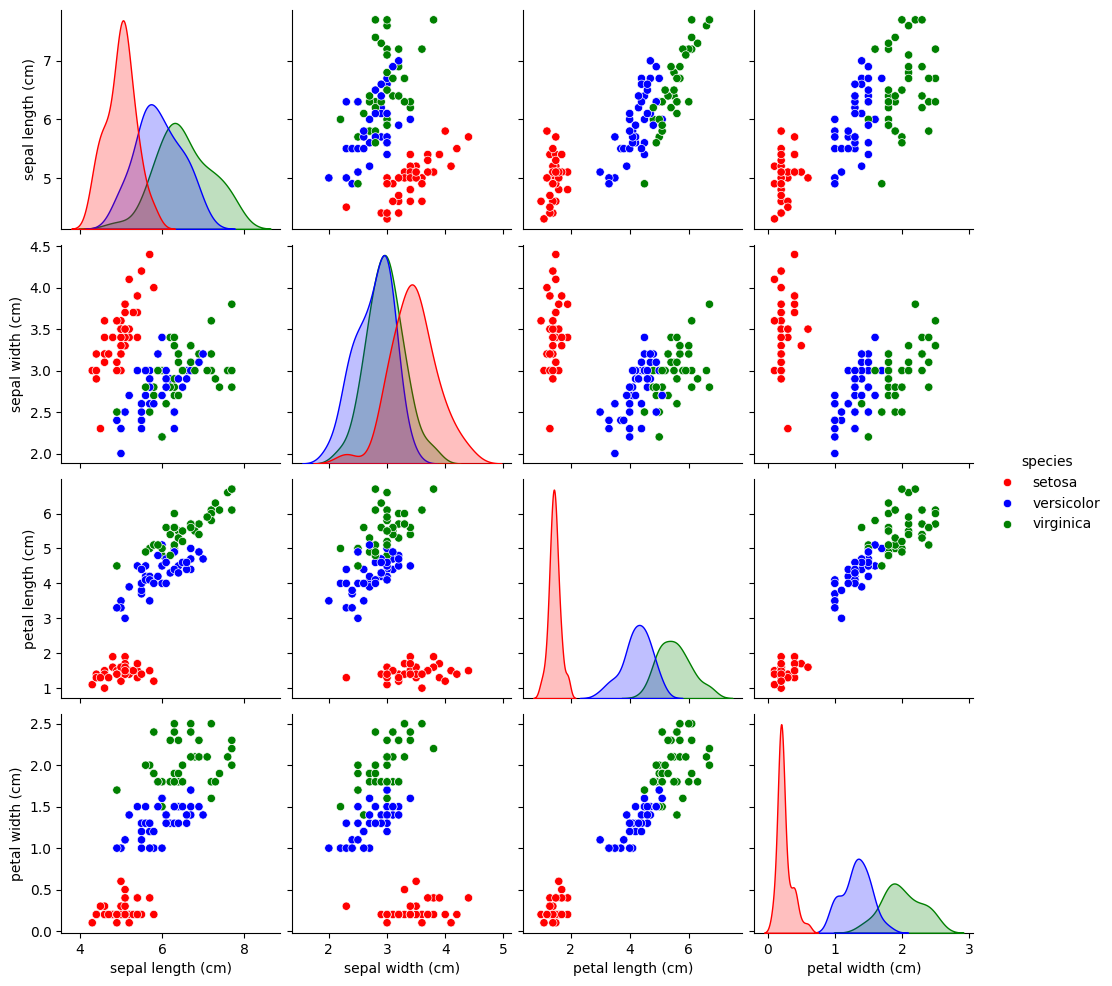

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

example = X_train.copy()
example['species'] = y_train

sns.pairplot(example, hue='species', palette=['red', 'blue', 'green']);

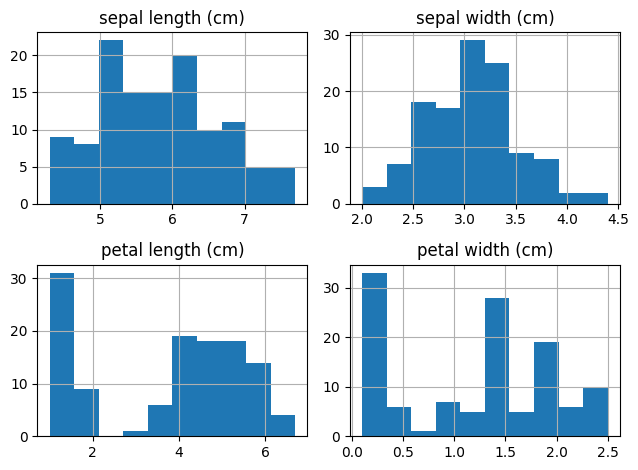

In [ ]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


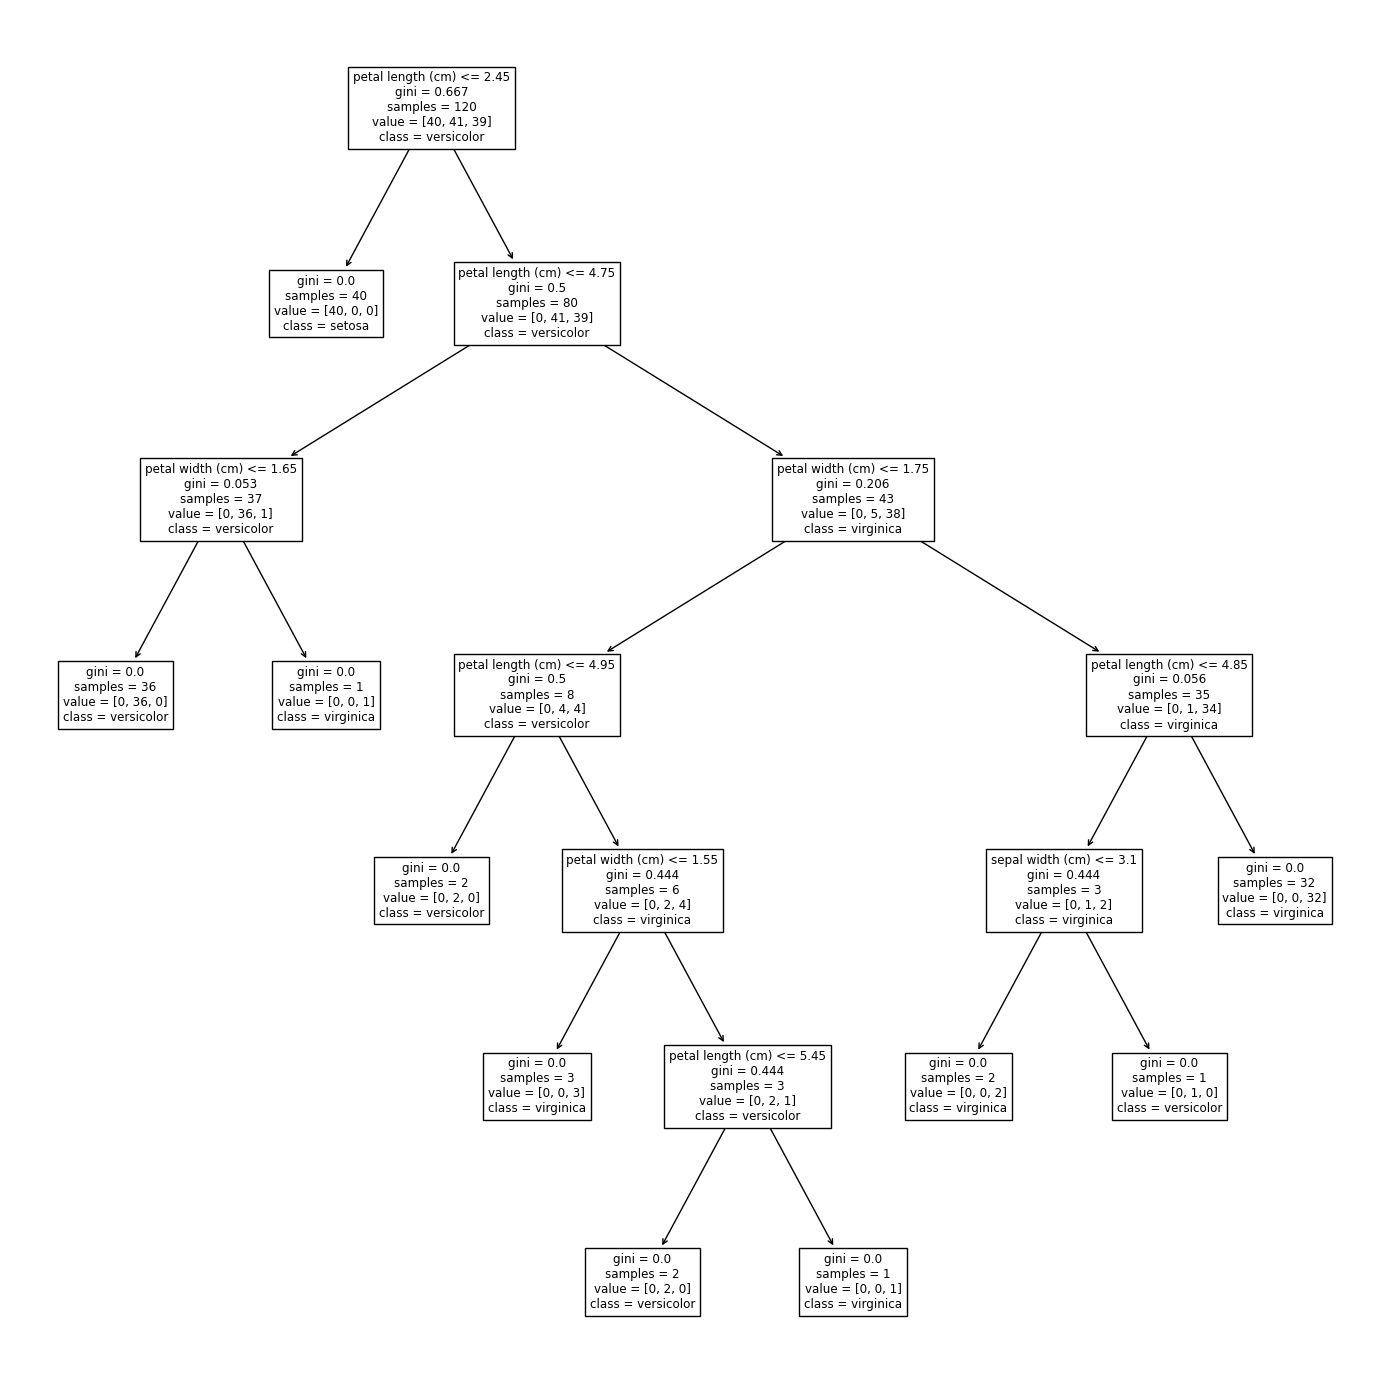

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.head())

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

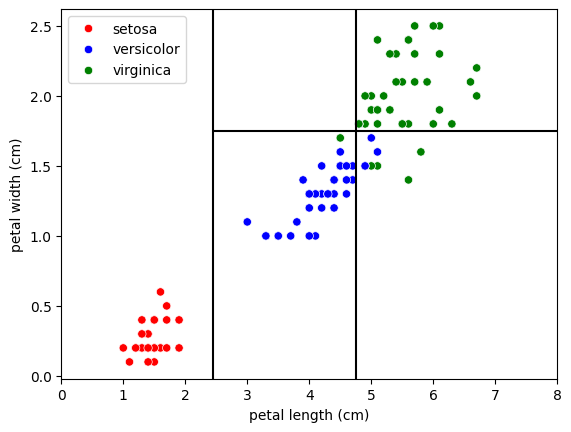

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axvline(x=2.45, color='black')
plt.axvline(x=4.75, color='black')
plt.hlines(y=1.75, xmin=2.45, xmax=8, color='black')

plt.xlim(0, 8)
plt.legend()
plt.show()

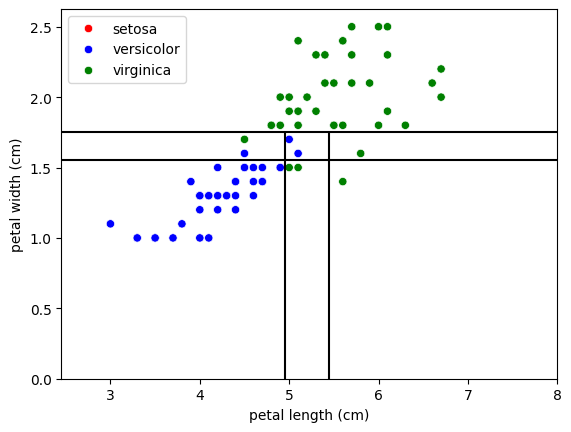

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'][example['petal length (cm)']>2.45],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axhline(y=1.75, color='black')
plt.vlines(x=4.95, ymin=0, ymax=1.75, color='black')
plt.vlines(x=5.45, ymin=0, ymax=1.75, color='black')
plt.axhline(y=1.55, color='black')

plt.xlim(2.45, 8)
plt.ylim(0, )
plt.legend()
plt.show()

## Random Forests

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/

An ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

https://en.wikipedia.org/wiki/Random_forest



### Ensemble Learning

In statistics and machine learning, **ensemble methods** use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

https://en.wikipedia.org/wiki/Ensemble_learning

See Ensemble Learning Notebook

The traditional way of performing hyperparameter optimization has been **grid search**, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

### Hyperparameters

The way to build a good model is through data collection, data cleaning, feature selection, and feature engineering. After we have done all of this, it is then time to optimize our model's performance through its hyperparameters.

A parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

Here are some default parameters:

<pre>
hyperparameters = {
            'n_estimators': 100,
            'criterion': 'gini',
            'max_depth': None,
            'max_leaf_nodes': None,
            'bootstrap': True
            }

model = RandomForestClassifier()
</pre>

**Parameters vs Hyperparameters**:
* Parameter: Usually estimated or learned from data
* Hyperparameter: Values that are tuned by the data scientist

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

iris = pd.DataFrame(data=X, columns=iris.feature_names)
iris['species'] = y
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1),
                                                    iris['species'],
                                                    test_size=0.20,
                                                    random_state=42)

### Overfitting

1.0


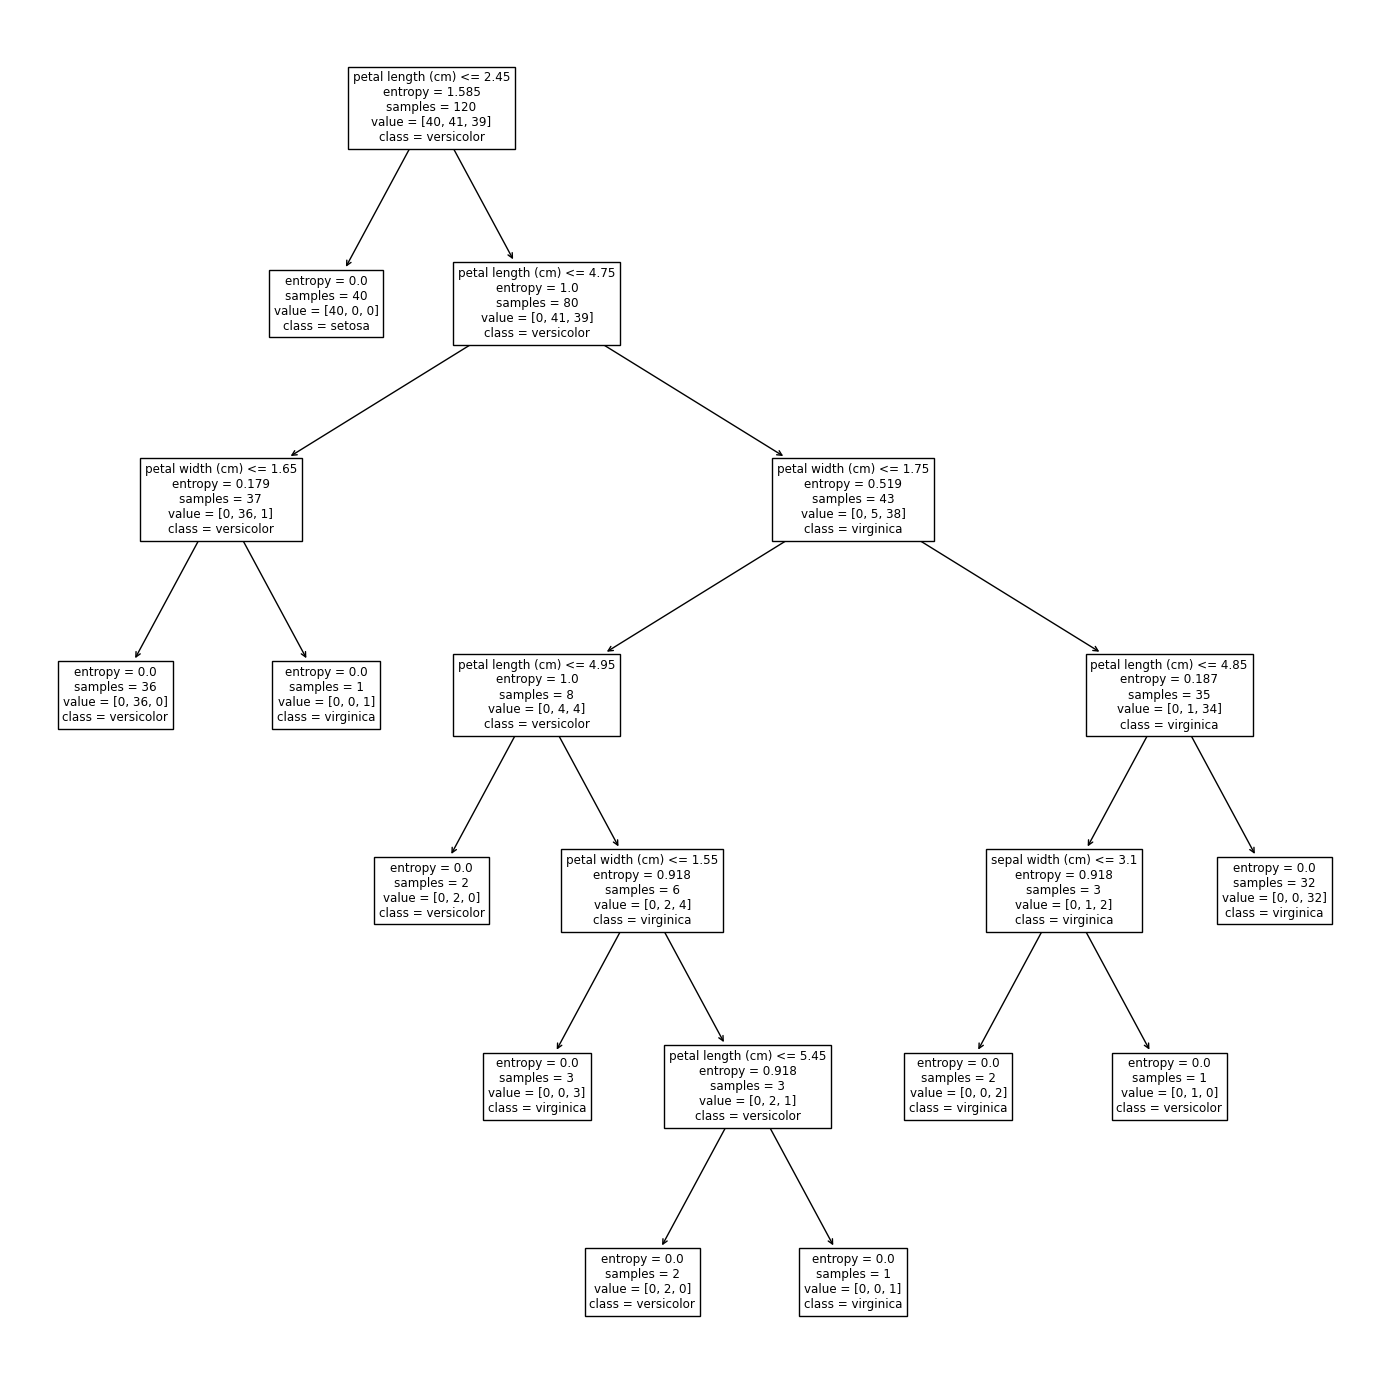

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy'
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

The above tree keeps splitting till all the nodes are pure and can lead to overfitting. The next cell introduces some (hyper)parameters that help avoid overfitting.

1.0


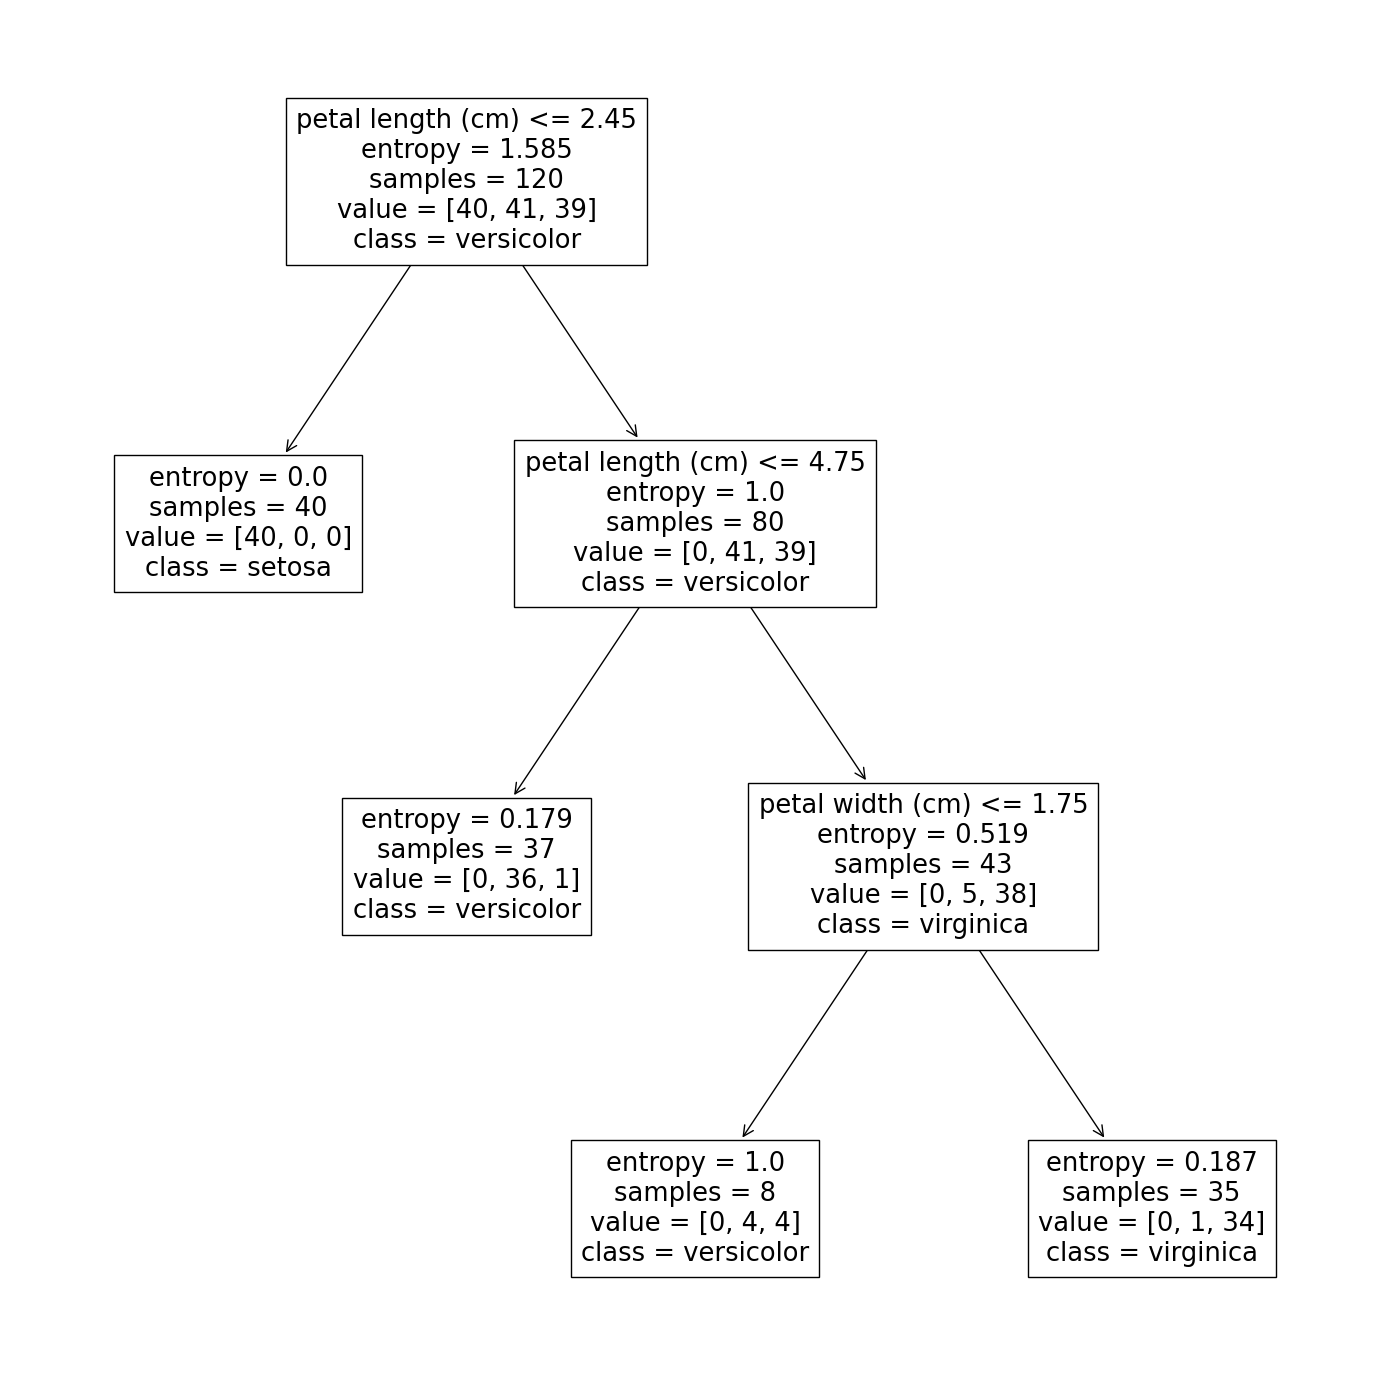

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy',
            'max_depth': 3,
            'max_leaf_nodes': 4
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

### Tuning Random Forest (Hyper)Parameters

Please see the following for the full list of (hyper)parameters:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Our choices when we performed Grid Search:

<pre>
hyperparameters = {
            'n_estimators': [50, 200],
            'criterion': ['entropy', 'gini'],
            'max_depth': [3, 4],
            'max_leaf_nodes': [7, 9],
            'bootstrap': [True, False]
            }
</pre>   

We are responsible for fine tuning (optimizing) our algorithm so we are providing a list of values, hyperparameters, we want to try out in order to find the optimal settings.

### max_depth

Number of levels in our tree. Our default iris levels are

### max_leaf_nodes

Max leaves

### bootstrap

Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

Random forests create many decision trees that sample data. The bootstrap hyperparameter sets sampling with or without replacement.

**Rule**: Never make adjustments to your model based on test set results.
            

### Grid Search

See Grid Search Notebook

### Cross Validation

See Cross Validation Notebook

* K-fold vs Group K-fold

https://towardsdatascience.com/why-you-should-never-use-cross-validation-4360d42456ac

### Our Final Random Forest Model with Grid Search

In [ ]:
# create dataframe from sklearn iris dataset; print shape, info, and head
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
print(df.shape)
print(df.info())
df.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# train test split using 25% for test size; print X_train shape and head
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.25,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

(112, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4                  5.0               3.6                1.4               0.2
32                 5.2               4.1                1.5               0.1
142                5.8               2.7                5.1               1.9
85                 6.0               3.4                4.5               1.6
86                 6.7               3.1                4.7               1.5


In [ ]:
# implement a grid search using max_depth, min_samples_split, min_samples_leaf, bootstrap, and criterion (entropy and gini)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {'max_depth': [2, 3],
              'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 5],
              'bootstrap': [True, False],
              'criterion': ['entropy', 'gini']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.9371212121212119
best parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# model = RandomForestClassifier(bootstrap = False,
#                                criterion = 'entropy',
#                                max_depth = 3,
#                                min_samples_leaf = 5,
#                                min_samples_split = 4,
#                                random_state = 42)
model = RandomForestClassifier(random_state = 42).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf